## Fourier-Safari 
---

Die Datei ```data.txt``` enthält Datenpunkte eines Signals. Gespeichert sind pro Zeile die aktuelle Zeit $t_i, i=0,\dots, N-1$ und die Signalamplitude $f_i \equiv f(t_i)$. 

Diese Daten werden mit Hilfe von ```np.loadtxt(...)``` aus der Datei in ein Array eingelesen. Die Spalten des Arrays werden anschließend als Views in zwei ein-dimensionale Arrays ```t``` und ```f``` verpackt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Settings für Plots
plt.rcParams['font.size'] = 15;
plt.rcParams['figure.figsize'] = [5,5]  

A = np.loadtxt('data.txt', delimiter=',')

# Zerlegen der Matrix in Arrays
t = A[:,0]
f = A[:,1]

#Anzahl der Punkte
N = t.shape[0]

Nun kann man zunächst das Signal plotten.

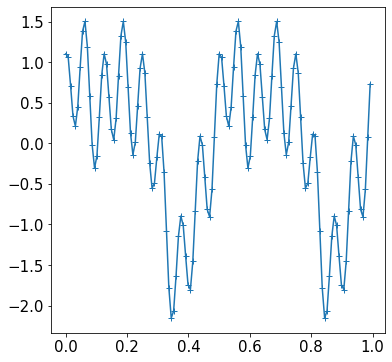

In [2]:
plt.figure(figsize=[6,6])
plt.plot(t, f, '+-')
plt.show()

Jetzt fertigen wir eine DFT des Signals an. Dazu verwenden wir ```np.fft(...)```. Das Ergebnis ist ein Array mit $N$ (im allgemeinen komplexen) Fourier-Koeffizienten. Wir lassen uns zunächst diese Koeffizienten gegen den Array-Index $i$ zeichnen.

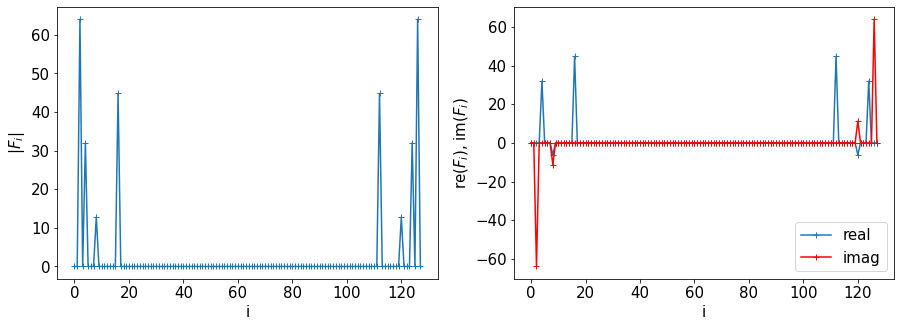

In [3]:
F = np.fft.fft(f)

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.plot(np.abs(F), '+-')
plt.xlabel('i')
plt.ylabel('$|F_i|$')

plt.subplot(1,2,2)
plt.plot(np.real(F), '+-', np.imag(F), 'r+-')
plt.legend(['real','imag'])
plt.xlabel('i')
plt.ylabel('re($F_i$), im($F_i$)')

plt.show()

Nun wollen wir den Koeffizienten auch die korrekten Frequenzen zuordnen. Dazu müssen wir zunächst $\Delta \omega = 2\pi/T$ bestimmen, wobei $T$ die Dauer des Signals ist. Anschließend müssen wir ein Array mit den Frequenzen $\omega_i = i \Delta \omega \, , i = 0, \dots,N-1$ füllen.  
Beachten muss man hierbei, dass die Zeit $T$ größer ist als die letzte Zeit, die aus der zuvor ausgelesenen Datei kommt. Sie ist genau um $\Delta t$ größer, wenn $\Delta t$ die Zeit zwischen zwei Zeiten ist. Der Ursprung dafür liegt in der Konvention wie Signale abgespeichert werden. 

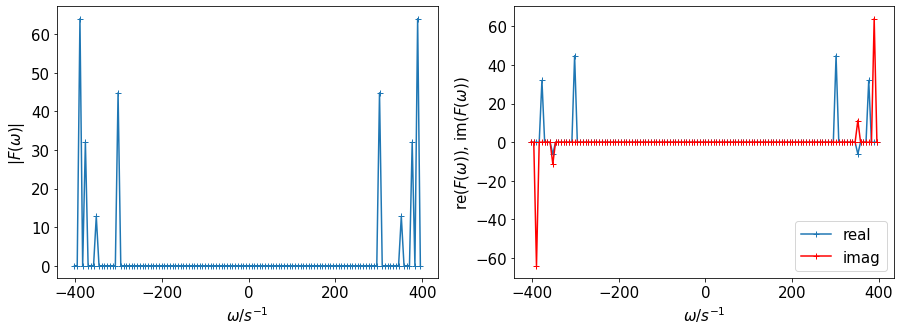

In [4]:
dt = t[2]-t[1]
T = t[-1] + dt
dOm = 2*np.pi / T

# Der Befehl np.arange(a,b) gibt eine Array mit ganzen Zahlen zwischen a und b aus, wobei b 
# nicht Teil des Arrays ist.
om = dOm * np.arange(-N/2, N/2)


# jetzt plotten wie vorher
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.plot(om, np.abs(F), '+-')
plt.ylabel('$|F(\omega)|$')
plt.xlabel('$\omega/s^{-1}$')

plt.subplot(1,2,2)
plt.plot(om, np.real(F), '+-', om, np.imag(F), 'r+-')
plt.legend(['real','imag'])
plt.ylabel('re($F(\omega)$), im($F(\omega)$)')
plt.xlabel('$\omega/s^{-1}$')

plt.show()


Nun fehlt nur noch der letzte Schliff. Bisher assoziieren wir alle Koeffizienten zu positiven Frequenzen. Die Koeffizienten mit Index $i \geq N/2$ können wir jedoch, wegen der Periodizität des Signals im Fourier-Raum ($\hat{f}(\omega_{N+j} = \hat{f}(\omega_j)$), auch negativen Frequenzen zuschreiben. Um diese Interpretation umzusetzen, müssen wir unser ```om```Array anders aufbauen und die Funktion ```np.fft.fftshift()``` benutzen.

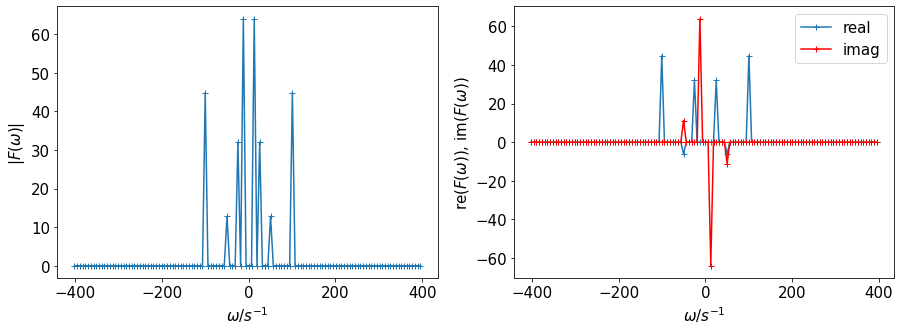

In [5]:
# Wichtig: Da wir nun wirklich im Fourier-Raum rechnen müssen wir auch mit den 
# korrekten Frequenzen rechnen, also \omega_{-N/2} bis \omega_{N/2-1}!
om = dOm * np.arange(-N/2, N/2)


# Transformieren und umsortieren
F = np.fft.fftshift(np.fft.fft(f))

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.plot(om, np.abs(F), '+-')
plt.ylabel('$|F(\omega)|$')
plt.xlabel('$\omega/s^{-1}$')

plt.subplot(1,2,2)
plt.plot(om, np.real(F), '+-', om, np.imag(F), 'r+-')
plt.legend(['real','imag'])
plt.ylabel('re($F(\omega)$), im($F(\omega)$)')
plt.xlabel('$\omega/s^{-1}$')

plt.show()

Jetzt können wir aus dem linken Bild herauslesen, dass insgesamt 4 Schwingungen zum Singal beitragen. Dabei zählt man nur die Peaks mit $\omega \geq 0$ (Erinnerung: $\cos(\omega t)$ und $\sin(\omega t)$ tragen jeweils die Freq. $+\omega$ und $-\omega$).  

Aus dem rechten Bild erhalten wir noch mehr Informationen: Es muss sich bei dem Signal um zwei Cosinus (blau) und zwei Sinus Schwingungen (rot) handeln. Die relativen Amplituden der Peaks entsprechen den relativen Amplituden der Schwingungen. 

---

### Zusammenfassung

Hier noch einmal das komplette, fertige Programm, dass Startpunkt für komplexere Programme sein kann:

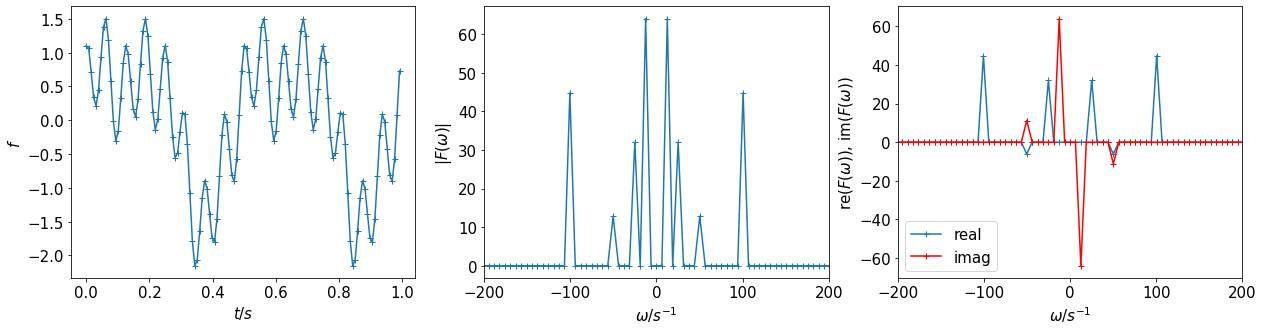

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Settings für Plots
plt.rcParams['font.size'] = 15;
plt.rcParams['figure.figsize'] = [5,5]  

A = np.loadtxt('data.txt', delimiter=',')
t = A[:,0]
f = A[:,1]

N = f.shape[0]

dt = t[2]-t[1]
T = t[-1] + dt
dOm = 2*np.pi / T

# Wichtig: Da wir nun wirklich im Fourier-Raum rechnen müssen wir auch mit den 
# korrekten Frequenzen rechnen, also \omega_{-N/2} bis \omega_{N/2-1}!
om = dOm * np.arange(-N/2, N/2)

# Transformieren und umsortieren
F = np.fft.fftshift(np.fft.fft(f))



plt.figure(figsize=[21,5])

plt.subplot(1,3,1)
plt.plot(t, f, '+-')
plt.ylabel('$f$')
plt.xlabel('$t/s$')

plt.subplot(1,3,2)
plt.plot(om, np.abs(F), '+-')
plt.ylabel('$|F(\omega)|$')
plt.xlabel('$\omega/s^{-1}$')
plt.xlim([-200, 200])

plt.subplot(1,3,3)
plt.plot(om, np.real(F), '+-', om, np.imag(F), 'r+-')
plt.legend(['real','imag'])
plt.ylabel('re($F(\omega)$), im($F(\omega)$)')
plt.xlabel('$\omega/s^{-1}$')
plt.xlim([-200, 200])

plt.show()